In [112]:
import pandas as pd
import numpy as npp 
import matplotlib.pyplot as plt 
import seaborn as sns

In [113]:
eventlog = pd.read_csv('Eventlog.csv')
eventlog.head()

,SL,EVENT_ID,CALL_TIME,CALL_TYPE,STATUS,CHIEF_COMPLAINT,HOSPITAL_NAME,PRIORITY,VEHICLE
0,1,CFS11521116,10-12-2020 07:59,CFS Call,At Scene,Deployement,NaN,Medium,B-74
1,2,CFS11521115,10-12-2020 07:59,CFS Call,Patient Not Available,Delivery,NaN,High,S-10
2,3,CFS11521114,10-12-2020 07:59,CFS Call,At Scene,Deployement,NaN,Medium,B-118
3,4,CFS11521113,10-12-2020 07:58,CFS Call,At Scene,Deployement,NaN,Medium,B-117
4,5,TST11521112,10-12-2020 07:58,Test Call,Not Available,Fracture,Gtb Hospital Dilshad Garden,High,NaN


In [114]:
responsetime = pd.read_csv('Responsetime.csv')
responsetime.tail()

,SL,EVENT_ID,CALL_TYPE,VEHICLE,DISTRICT,CALL_TIME,VEHICLE_MOVEMENT_TIME,VEHICLE_ATSCENE_TIME,RESPONSE_TIME,RESPONSE_DURATION,AMBULANCE_BASE_LOCATION,INCIDENT_LOCATION,NUM_OF_PATIENTS,PATIENT_HOSPITAL,EMERGENCY_TYPE,HANDOVER_TIME,HANDOVER_DURATION
61805,61806,CFS11505774,CFS Call,DL-1A-2958 / A-13,NaN,07-12-2020 07:57,58:36.9,02-10-2021 07:58,00:00:17,64.0,0,NaN,0,NaN,Deployement,NaN,NaN
61806,61807,CFS11505776,CFS Call,DL-1A-2926 / A-19,NaN,07-12-2020 07:58,59:12.9,02-10-2021 07:59,00:00:21,70.0,0,NaN,0,NaN,Deployement,NaN,NaN
61807,61808,CFS11505778,CFS Call,DL-1A-2945 / A-22,NaN,07-12-2020 07:58,59:52.2,02-10-2021 08:28,00:28:49,1785.0,0,NaN,0,NaN,Deployement,NaN,NaN
61808,61809,CFS11505773,CFS Call,DL-1A-2435 / S-5,Shahdara,07-12-2020 07:57,01:16.6,02-10-2021 08:20,00:19:38,1416.0,0,Pocket A,0,NaN,Others,NaN,NaN
61809,61810,CFS11505779,CFS Call,DL-1A-3016 / A-28,NaN,07-12-2020 07:59,00:24.4,02-10-2021 08:00,00:00:03,49.0,0,NaN,0,NaN,Deployement,NaN,NaN


In [115]:
responsetime.columns

Index(['SL', 'EVENT_ID', 'CALL_TYPE', 'VEHICLE', 'DISTRICT', 'CALL_TIME',
       'VEHICLE_MOVEMENT_TIME', 'VEHICLE_ATSCENE_TIME', 'RESPONSE_TIME',
       'RESPONSE_DURATION', 'AMBULANCE_BASE_LOCATION', 'INCIDENT_LOCATION',
       'NUM_OF_PATIENTS', 'PATIENT_HOSPITAL', 'EMERGENCY_TYPE',
       'HANDOVER_TIME', 'HANDOVER_DURATION'],
      dtype='object')

In [116]:
responsetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61810 entries, 0 to 61809
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SL                       61810 non-null  int64  
 1   EVENT_ID                 61810 non-null  object 
 2   CALL_TYPE                61810 non-null  object 
 3   VEHICLE                  61810 non-null  object 
 4   DISTRICT                 30207 non-null  object 
 5   CALL_TIME                61810 non-null  object 
 6   VEHICLE_MOVEMENT_TIME    37885 non-null  object 
 7   VEHICLE_ATSCENE_TIME     37710 non-null  object 
 8   RESPONSE_TIME            37710 non-null  object 
 9   RESPONSE_DURATION        37710 non-null  float64
 10  AMBULANCE_BASE_LOCATION  61810 non-null  int64  
 11  INCIDENT_LOCATION        30193 non-null  object 
 12  NUM_OF_PATIENTS          61810 non-null  int64  
 13  PATIENT_HOSPITAL         25651 non-null  object 
 14  EMERGENCY_TYPE        

In [117]:
responsetime.isnull().sum()

SL                             0
EVENT_ID                       0
CALL_TYPE                      0
VEHICLE                        0
DISTRICT                   31603
CALL_TIME                      0
VEHICLE_MOVEMENT_TIME      23925
VEHICLE_ATSCENE_TIME       24100
RESPONSE_TIME              24100
RESPONSE_DURATION          24100
AMBULANCE_BASE_LOCATION        0
INCIDENT_LOCATION          31617
NUM_OF_PATIENTS                0
PATIENT_HOSPITAL           36159
EMERGENCY_TYPE              9118
HANDOVER_TIME              38096
HANDOVER_DURATION          38096
dtype: int64

In [118]:
eventlog.isnull().sum()

SL                      0
EVENT_ID                0
CALL_TIME               0
CALL_TYPE               0
STATUS                  0
CHIEF_COMPLAINT    103367
HOSPITAL_NAME      130408
PRIORITY           102525
VEHICLE            117964
dtype: int64

In [119]:
responsetime.columns

Index(['SL', 'EVENT_ID', 'CALL_TYPE', 'VEHICLE', 'DISTRICT', 'CALL_TIME',
       'VEHICLE_MOVEMENT_TIME', 'VEHICLE_ATSCENE_TIME', 'RESPONSE_TIME',
       'RESPONSE_DURATION', 'AMBULANCE_BASE_LOCATION', 'INCIDENT_LOCATION',
       'NUM_OF_PATIENTS', 'PATIENT_HOSPITAL', 'EMERGENCY_TYPE',
       'HANDOVER_TIME', 'HANDOVER_DURATION'],
      dtype='object')

In [120]:
responsetime.fillna({
    'VEHICLE_MOVEMENT_TIME' : '00:00:00',
    'VEHICLE_ATSCENE_TIME' : '00:00:00',
    'RESPONSE_TIME'  : '00:00:00',
    'HANDOVER_TIME'  : '00:00:00',
    'HANDOVER_DURATION' : '00'
    
},inplace = True)

In [121]:
responsetime.head()

,SL,EVENT_ID,CALL_TYPE,VEHICLE,DISTRICT,CALL_TIME,VEHICLE_MOVEMENT_TIME,VEHICLE_ATSCENE_TIME,RESPONSE_TIME,RESPONSE_DURATION,AMBULANCE_BASE_LOCATION,INCIDENT_LOCATION,NUM_OF_PATIENTS,PATIENT_HOSPITAL,EMERGENCY_TYPE,HANDOVER_TIME,HANDOVER_DURATION
0,1,TST11515684,Test Call,null / null,South West,09-12-2020 08:01,00:00:00,00:00:00,00:00:00,NaN,0,Palam Extn Part I,0,NaN,Fracture,00:00:00,00
1,2,TST11515692,Test Call,null / null,NaN,09-12-2020 08:03,00:00:00,00:00:00,00:00:00,NaN,0,NaN,0,NaN,Delivery,00:00:00,00
2,3,TST11515693,Test Call,null / null,South West,09-12-2020 08:03,00:00:00,00:00:00,00:00:00,NaN,0,Dwarka Sector 27,0,NaN,Fracture,00:00:00,00
3,4,TST11515696,Test Call,null / null,North West,09-12-2020 08:03,00:00:00,00:00:00,00:00:00,NaN,0,Kirari Extn,0,NaN,Delivery,00:00:00,00
4,5,TST11515698,Test Call,null / null,NaN,09-12-2020 08:04,00:00:00,00:00:00,00:00:00,NaN,0,NaN,0,Aiims Ansari Nagar,Fracture,00:00:00,00


In [122]:
responsetime.drop(['SL','VEHICLE','AMBULANCE_BASE_LOCATION','NUM_OF_PATIENTS'], axis = 1, inplace = True)

In [123]:
responsetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61810 entries, 0 to 61809
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EVENT_ID               61810 non-null  object 
 1   CALL_TYPE              61810 non-null  object 
 2   DISTRICT               30207 non-null  object 
 3   CALL_TIME              61810 non-null  object 
 4   VEHICLE_MOVEMENT_TIME  61810 non-null  object 
 5   VEHICLE_ATSCENE_TIME   61810 non-null  object 
 6   RESPONSE_TIME          61810 non-null  object 
 7   RESPONSE_DURATION      37710 non-null  float64
 8   INCIDENT_LOCATION      30193 non-null  object 
 9   PATIENT_HOSPITAL       25651 non-null  object 
 10  EMERGENCY_TYPE         52692 non-null  object 
 11  HANDOVER_TIME          61810 non-null  object 
 12  HANDOVER_DURATION      61810 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.1+ MB


In [124]:
responsetime['CALL_DATE'] = pd.to_datetime(responsetime.CALL_TIME).dt.date

In [125]:
responsetime['CALL_DATE']

0        2020-09-12
1        2020-09-12
2        2020-09-12
3        2020-09-12
4        2020-09-12
            ...    
61805    2020-07-12
61806    2020-07-12
61807    2020-07-12
61808    2020-07-12
61809    2020-07-12
Name: CALL_DATE, Length: 61810, dtype: object

In [126]:
responsetime['CALL_HOUR'] = pd.to_datetime(responsetime.CALL_TIME).dt.time

In [127]:
responsetime['CALL_HOUR']

0        08:01:00
1        08:03:00
2        08:03:00
3        08:03:00
4        08:04:00
           ...   
61805    07:57:00
61806    07:58:00
61807    07:58:00
61808    07:57:00
61809    07:59:00
Name: CALL_HOUR, Length: 61810, dtype: object

In [128]:
responsetime.drop(['CALL_TIME'], axis = 1, inplace = True)

In [129]:
responsetime.tail()

,EVENT_ID,CALL_TYPE,DISTRICT,VEHICLE_MOVEMENT_TIME,VEHICLE_ATSCENE_TIME,RESPONSE_TIME,RESPONSE_DURATION,INCIDENT_LOCATION,PATIENT_HOSPITAL,EMERGENCY_TYPE,HANDOVER_TIME,HANDOVER_DURATION,CALL_DATE,CALL_HOUR
61805,CFS11505774,CFS Call,NaN,58:36.9,02-10-2021 07:58,00:00:17,64.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:57:00
61806,CFS11505776,CFS Call,NaN,59:12.9,02-10-2021 07:59,00:00:21,70.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00
61807,CFS11505778,CFS Call,NaN,59:52.2,02-10-2021 08:28,00:28:49,1785.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00
61808,CFS11505773,CFS Call,Shahdara,01:16.6,02-10-2021 08:20,00:19:38,1416.0,Pocket A,NaN,Others,00:00:00,00,2020-07-12,07:57:00
61809,CFS11505779,CFS Call,NaN,00:24.4,02-10-2021 08:00,00:00:03,49.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:59:00


In [130]:
move_time = list(responsetime['VEHICLE_MOVEMENT_TIME'])

for i in range(len(mov_time)):
    move_time[i]= move_time[i].split(sep = '.')[0]
    
VEHICLE_TIME = []


for i in range(len(move_time)):
    VEHICLE_TIME.append(move_time[i].split(sep = '.')[0] +':00')
    

    




In [131]:
responsetime['VEHICLE_MOVEMENT_TIME'] = VEHICLE_TIME
responsetime.tail()

,EVENT_ID,CALL_TYPE,DISTRICT,VEHICLE_MOVEMENT_TIME,VEHICLE_ATSCENE_TIME,RESPONSE_TIME,RESPONSE_DURATION,INCIDENT_LOCATION,PATIENT_HOSPITAL,EMERGENCY_TYPE,HANDOVER_TIME,HANDOVER_DURATION,CALL_DATE,CALL_HOUR
61805,CFS11505774,CFS Call,NaN,58:36:00,02-10-2021 07:58,00:00:17,64.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:57:00
61806,CFS11505776,CFS Call,NaN,59:12:00,02-10-2021 07:59,00:00:21,70.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00
61807,CFS11505778,CFS Call,NaN,59:52:00,02-10-2021 08:28,00:28:49,1785.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00
61808,CFS11505773,CFS Call,Shahdara,01:16:00,02-10-2021 08:20,00:19:38,1416.0,Pocket A,NaN,Others,00:00:00,00,2020-07-12,07:57:00
61809,CFS11505779,CFS Call,NaN,00:24:00,02-10-2021 08:00,00:00:03,49.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:59:00


In [132]:
responsetime['VEHICLE_ATSCENE_HOUR'] = pd.to_datetime(responsetime.VEHICLE_ATSCENE_TIME)


In [133]:
responsetime['VEHICLE_ATSCENE_HOUR'] = pd.to_datetime(responsetime.VEHICLE_ATSCENE_TIME).dt.time

In [134]:
responsetime['VEHICLE_ATSCENE_HOUR']

0        00:00:00
1        00:00:00
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
61805    07:58:00
61806    07:59:00
61807    08:28:00
61808    08:20:00
61809    08:00:00
Name: VEHICLE_ATSCENE_HOUR, Length: 61810, dtype: object

In [135]:
responsetime.drop(['VEHICLE_ATSCENE_TIME'], axis = 1, inplace = True)

In [136]:
responsetime.tail()

,EVENT_ID,CALL_TYPE,DISTRICT,VEHICLE_MOVEMENT_TIME,RESPONSE_TIME,RESPONSE_DURATION,INCIDENT_LOCATION,PATIENT_HOSPITAL,EMERGENCY_TYPE,HANDOVER_TIME,HANDOVER_DURATION,CALL_DATE,CALL_HOUR,VEHICLE_ATSCENE_HOUR
61805,CFS11505774,CFS Call,NaN,58:36:00,00:00:17,64.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:57:00,07:58:00
61806,CFS11505776,CFS Call,NaN,59:12:00,00:00:21,70.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00,07:59:00
61807,CFS11505778,CFS Call,NaN,59:52:00,00:28:49,1785.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:58:00,08:28:00
61808,CFS11505773,CFS Call,Shahdara,01:16:00,00:19:38,1416.0,Pocket A,NaN,Others,00:00:00,00,2020-07-12,07:57:00,08:20:00
61809,CFS11505779,CFS Call,NaN,00:24:00,00:00:03,49.0,NaN,NaN,Deployement,00:00:00,00,2020-07-12,07:59:00,08:00:00


In [137]:
responsetime['HANDOVER_TIME'] = pd.to_datetime(responsetime.HANDOVER_TIME).dt.time


In [138]:
call_counts  = responsetime['CALL_TYPE'].value_counts()

In [139]:
calls = responsetime.groupby(by = 'CALL_TYPE').max()
calls

C:\Users\Win\AppData\Local\Temp\ipykernel_12028\4256072340.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  calls = responsetime.groupby(by = 'CALL_TYPE').max()


,EVENT_ID,VEHICLE_MOVEMENT_TIME,RESPONSE_TIME,RESPONSE_DURATION,HANDOVER_TIME,CALL_DATE,CALL_HOUR,VEHICLE_ATSCENE_HOUR
CALL_TYPE,,,,,,,,
Appreciation Call,APR11635709,00:00:00:00,00:00:00,NaN,00:00:00,2021-02-01,07:47:00,00:00:00
Blank Call,BLK11653971,00:00:00:00,00:00:00,NaN,00:00:00,2021-06-01,23:59:00,00:00:00
CFS Call,CFS11654387,59:59:00,11:41:37,42273.0,23:59:00,2021-06-01,23:59:00,23:59:00
Crank Call,CRK11648032,00:00:00:00,00:00:00,NaN,00:00:00,2021-04-01,23:11:00,00:00:00
Department Call,DEP11653925,00:00:00:00,00:00:00,NaN,00:00:00,2021-06-01,23:58:00,00:00:00
Enquiry Call,ENQ11654289,00:00:00:00,00:00:00,NaN,00:00:00,2021-06-01,23:56:00,00:00:00
Follow up,FUP11654381,00:00:00:00,00:00:00,NaN,00:00:00,2021-06-01,23:59:00,00:00:00
Missed Call,CFS11649869,47:50:00,00:49:33,3164.0,23:26:00,2021-05-01,23:35:00,23:39:00
Test Call,TST11654369,00:00:00:00,00:00:00,NaN,00:00:00,2021-06-01,23:59:00,00:00:00


In [140]:
calls.index

Index(['Appreciation Call', 'Blank Call', 'CFS Call', 'Crank Call',
       'Department Call', 'Enquiry Call', 'Follow up', 'Missed Call',
       'Test Call', 'Wrong Call'],
      dtype='object', name='CALL_TYPE')

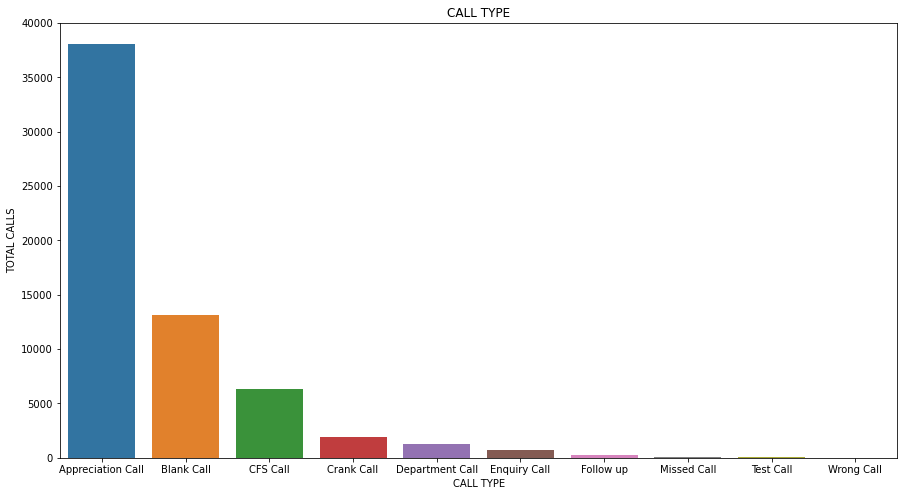

In [141]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = calls.index, y = call_counts)
plt.xlabel('CALL TYPE')
plt.ylabel('TOTAL CALLS')
plt.title('CALL TYPE')
plt.show()

In [142]:
eme_counts =  responsetime['EMERGENCY_TYPE'].value_counts()
eme_counts

Interhospital Transfer        7378
Others                        5104
Dialysis                      4721
Delivery                      4718
Fracture                      4032
                              ... 
Penetrating Trauma Stab          2
Choking                          2
Riot                             2
Demolition                       2
call refused due to Amb NA       1
Name: EMERGENCY_TYPE, Length: 66, dtype: int64

In [143]:
emergency = responsetime.groupby(by = 'EMERGENCY_TYPE').max()

C:\Users\Win\AppData\Local\Temp\ipykernel_12028\2438846659.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  emergency = responsetime.groupby(by = 'EMERGENCY_TYPE').max()


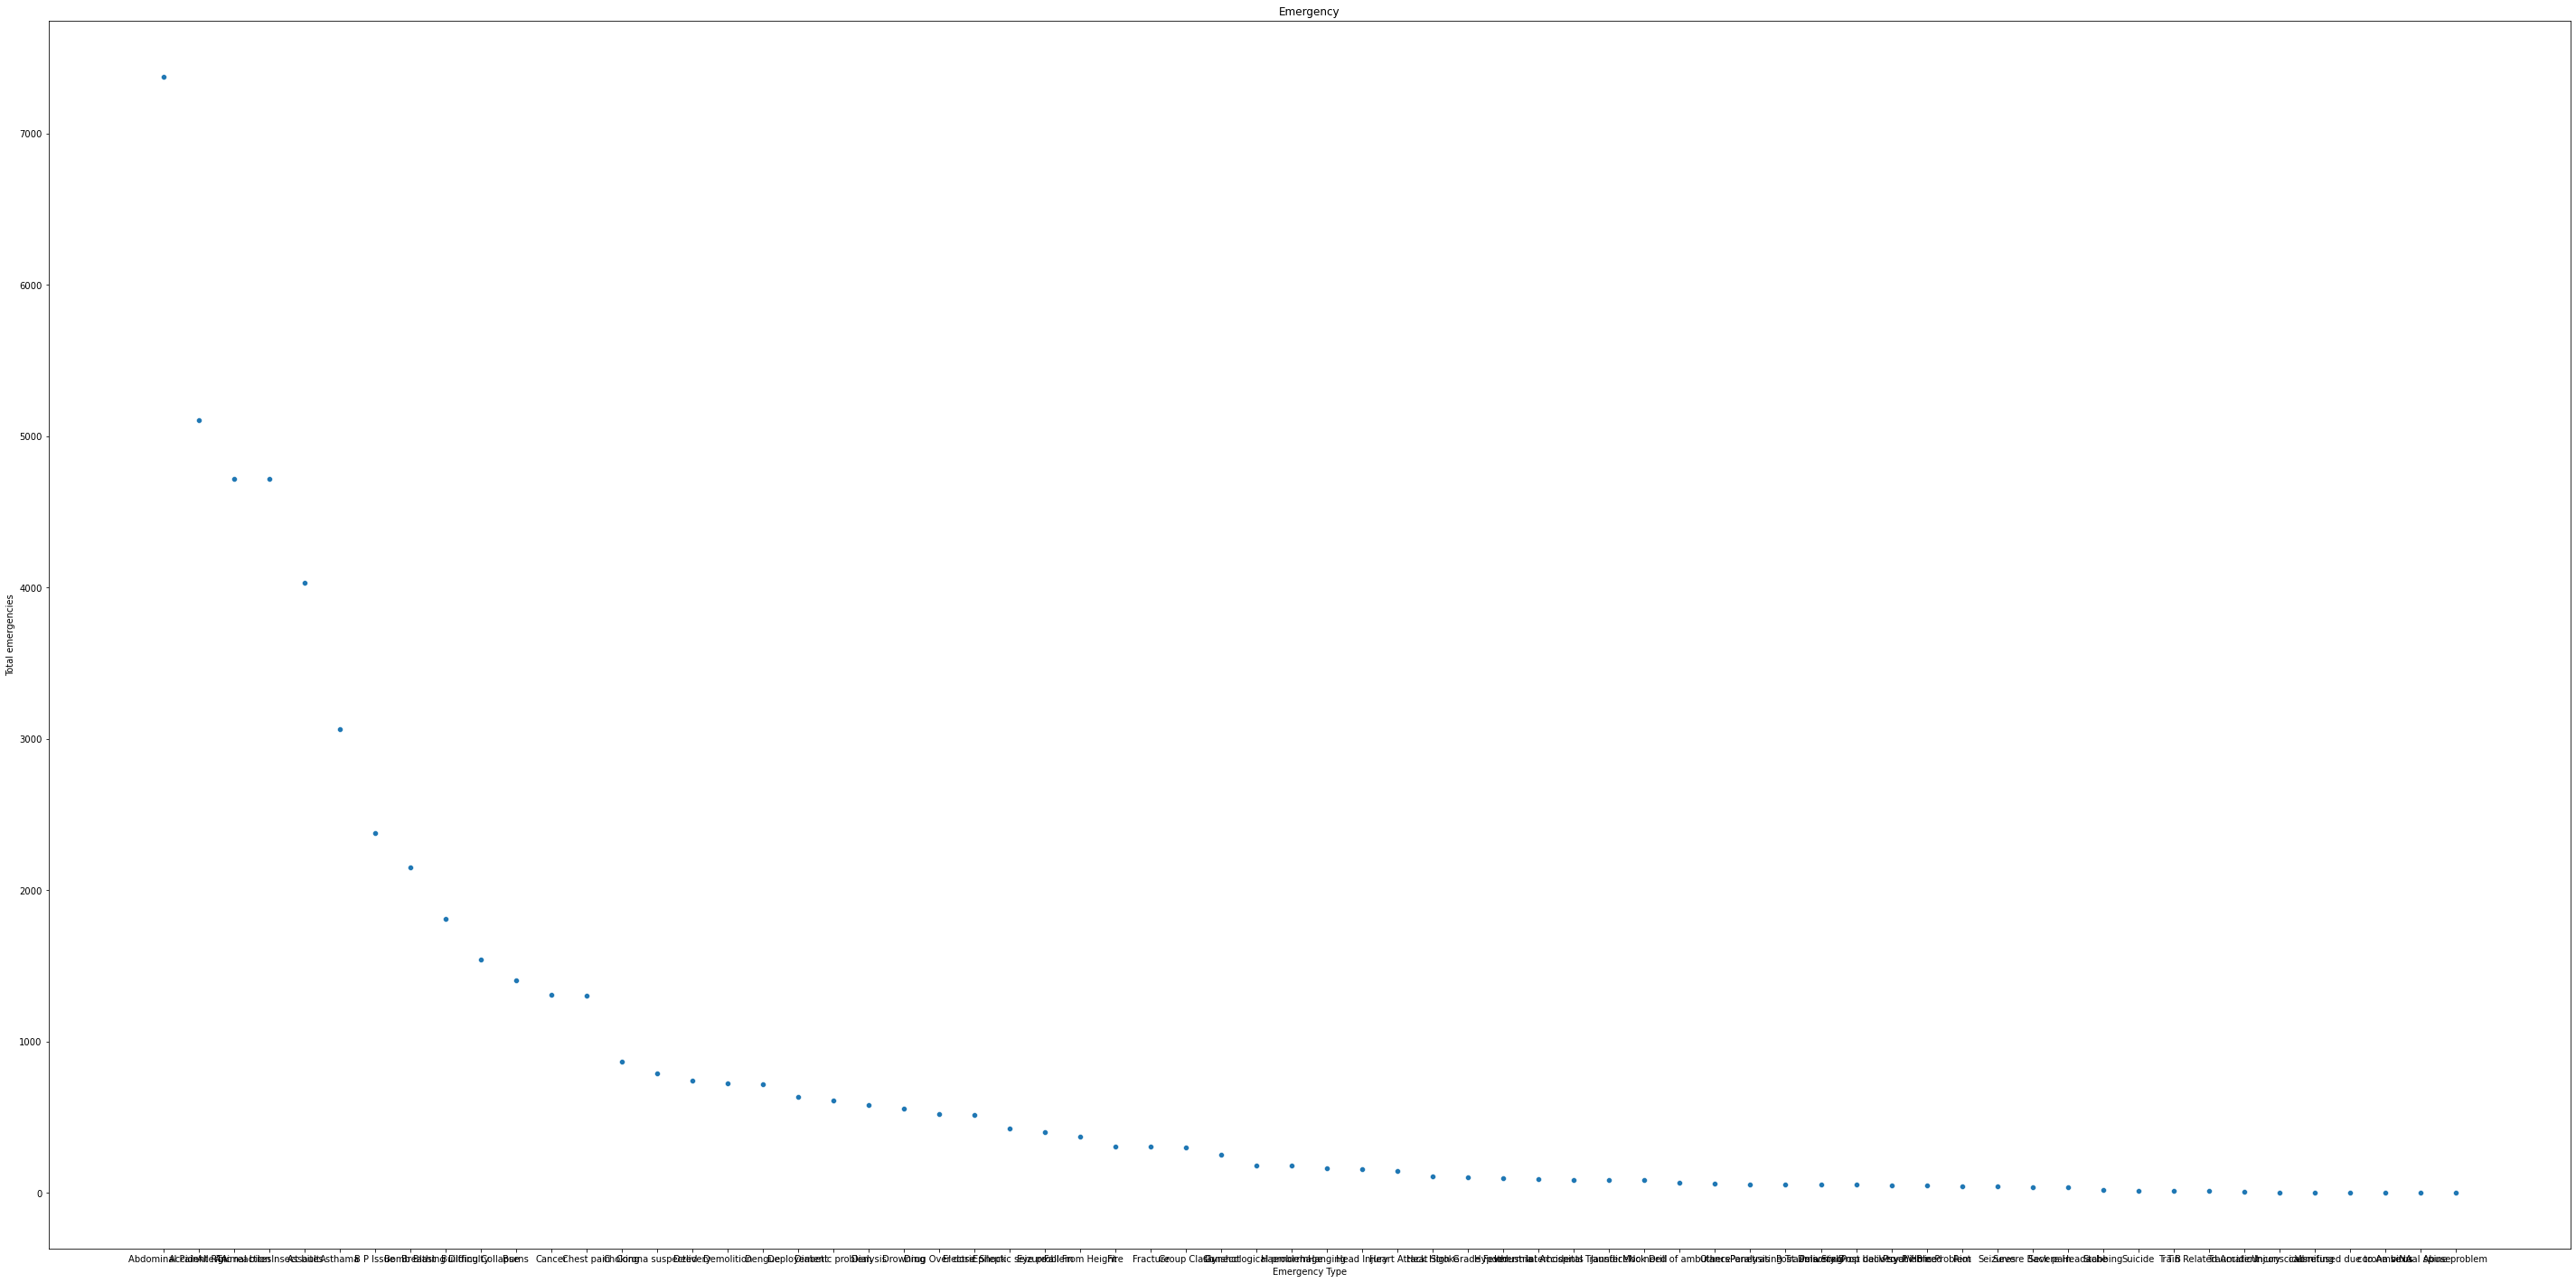

In [144]:
plt.figure(figsize = (50,25))
ax = sns.scatterplot(x = emergency.index, y = eme_counts)
plt.xlabel('Emergency Type')
plt.ylabel('Total emergencies')
plt.title('Emergency')
plt.show()

In [145]:
eventlog.tail()

,SL,EVENT_ID,CALL_TIME,CALL_TYPE,STATUS,CHIEF_COMPLAINT,HOSPITAL_NAME,PRIORITY,VEHICLE
156054,156055,WRG11500108,06-12-2020 08:01,Wrong Call,Not Available,NaN,NaN,NaN,NaN
156055,156056,BLK11500107,06-12-2020 08:01,Blank Call,Not Available,NaN,NaN,NaN,NaN
156056,156057,CFS11500106,06-12-2020 08:01,CFS Call,Hand Over,Deployement,NaN,Medium,B-74
156057,156058,BLK11500105,06-12-2020 08:00,Blank Call,Not Available,NaN,NaN,NaN,NaN
156058,156059,CFS11500104,06-12-2020 08:00,CFS Call,Hand Over,Deployement,NaN,Medium,B-118


In [146]:
eventlog['CALL_DATE']  = pd.to_datetime(eventlog['CALL_TIME']).dt.date
eventlog['CALL_DATE'] 

0         2020-10-12
1         2020-10-12
2         2020-10-12
3         2020-10-12
4         2020-10-12
             ...    
156054    2020-06-12
156055    2020-06-12
156056    2020-06-12
156057    2020-06-12
156058    2020-06-12
Name: CALL_DATE, Length: 156059, dtype: object

In [147]:
eventlog['CALL_HOUR'] = pd.to_datetime(eventlog['CALL_TIME']).dt.time
eventlog['CALL_HOUR']

0         07:59:00
1         07:59:00
2         07:59:00
3         07:58:00
4         07:58:00
            ...   
156054    08:01:00
156055    08:01:00
156056    08:01:00
156057    08:00:00
156058    08:00:00
Name: CALL_HOUR, Length: 156059, dtype: object

In [148]:
eventlog.head()

,SL,EVENT_ID,CALL_TIME,CALL_TYPE,STATUS,CHIEF_COMPLAINT,HOSPITAL_NAME,PRIORITY,VEHICLE,CALL_DATE,CALL_HOUR
0,1,CFS11521116,10-12-2020 07:59,CFS Call,At Scene,Deployement,NaN,Medium,B-74,2020-10-12,07:59:00
1,2,CFS11521115,10-12-2020 07:59,CFS Call,Patient Not Available,Delivery,NaN,High,S-10,2020-10-12,07:59:00
2,3,CFS11521114,10-12-2020 07:59,CFS Call,At Scene,Deployement,NaN,Medium,B-118,2020-10-12,07:59:00
3,4,CFS11521113,10-12-2020 07:58,CFS Call,At Scene,Deployement,NaN,Medium,B-117,2020-10-12,07:58:00
4,5,TST11521112,10-12-2020 07:58,Test Call,Not Available,Fracture,Gtb Hospital Dilshad Garden,High,NaN,2020-10-12,07:58:00


In [149]:
eventlog.drop(['CALL_TIME'], axis = 1, inplace = True)

In [150]:
eventlog.head()

,SL,EVENT_ID,CALL_TYPE,STATUS,CHIEF_COMPLAINT,HOSPITAL_NAME,PRIORITY,VEHICLE,CALL_DATE,CALL_HOUR
0,1,CFS11521116,CFS Call,At Scene,Deployement,NaN,Medium,B-74,2020-10-12,07:59:00
1,2,CFS11521115,CFS Call,Patient Not Available,Delivery,NaN,High,S-10,2020-10-12,07:59:00
2,3,CFS11521114,CFS Call,At Scene,Deployement,NaN,Medium,B-118,2020-10-12,07:59:00
3,4,CFS11521113,CFS Call,At Scene,Deployement,NaN,Medium,B-117,2020-10-12,07:58:00
4,5,TST11521112,Test Call,Not Available,Fracture,Gtb Hospital Dilshad Garden,High,NaN,2020-10-12,07:58:00


In [151]:
eventlog['STATUS'] = eventlog['STATUS'].replace(['Patient Not Available', 'Not Available'], 'Not Available')

In [152]:
eventlog.head()

,SL,EVENT_ID,CALL_TYPE,STATUS,CHIEF_COMPLAINT,HOSPITAL_NAME,PRIORITY,VEHICLE,CALL_DATE,CALL_HOUR
0,1,CFS11521116,CFS Call,At Scene,Deployement,NaN,Medium,B-74,2020-10-12,07:59:00
1,2,CFS11521115,CFS Call,Not Available,Delivery,NaN,High,S-10,2020-10-12,07:59:00
2,3,CFS11521114,CFS Call,At Scene,Deployement,NaN,Medium,B-118,2020-10-12,07:59:00
3,4,CFS11521113,CFS Call,At Scene,Deployement,NaN,Medium,B-117,2020-10-12,07:58:00
4,5,TST11521112,Test Call,Not Available,Fracture,Gtb Hospital Dilshad Garden,High,NaN,2020-10-12,07:58:00


In [153]:
eventlog['STATUS'].value_counts()

Not Available            129955
Hand Over                 22451
Enroute                    1547
Closed By Operator         1047
At Scene                    554
Reached                     170
Dispatch Failed             153
On Route                    117
Delivery Pending             26
Pending                      20
Abandoned By Operator        14
Dispatched                    5
Name: STATUS, dtype: int64

In [154]:
eventlog['HOSPITAL_NAME'].value_counts()

Safdarjang Hospital Ansari Nagar              4337
Bsa Hospital Rohini                           2300
Dduh Hari Nagar                               2034
Rml Hospital                                  2002
LNJP Hospital Delhi Gate                      1192
                                              ... 
RATHI HOSPITAL NAJAFGARH ROAD RANHOLA            1
Central Jail Hospital Jail Road Hari Nagar       1
KAPIL HOSPITAL NATHUPURA BURARI                  1
Centre For Sight Rajouri GardenEye Care          1
SIGNUS HOSPITAL RAMA VIHAR KARALA                1
Name: HOSPITAL_NAME, Length: 141, dtype: int64

In [155]:
eventlog['PRIORITY'].value_counts()

Medium       24563
High         16381
Low           7104
Emergency     5486
Name: PRIORITY, dtype: int64

In [156]:
status = eventlog.groupby(by = 'STATUS').max()
status

C:\Users\Win\AppData\Local\Temp\ipykernel_12028\1499585693.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  status = eventlog.groupby(by = 'STATUS').max()


,SL,EVENT_ID,CALL_TYPE,CALL_DATE,CALL_HOUR
STATUS,,,,,
Abandoned By Operator,133825,CFS11631606,CFS Call,2021-01-01,21:18:00
At Scene,155841,CFS11654379,Missed Call,2021-06-01,23:59:00
Closed By Operator,155953,CFS11654172,Missed Call,2021-06-01,23:55:00
Delivery Pending,121018,CFS11638765,CFS Call,2021-02-01,23:36:00
Dispatch Failed,154995,CFS11652185,CFS Call,2021-05-01,23:43:00
Dispatched,120075,CFS11591675,CFS Call,2020-12-24,12:23:00
Enroute,155300,CFS11654359,Missed Call,2021-06-01,23:59:00
Hand Over,156059,CFS11654311,Missed Call,2021-06-01,23:59:00
Not Available,156058,WRG11654323,Wrong Call,2021-06-01,23:59:00


Text(0, 0.5, 'STATUS')

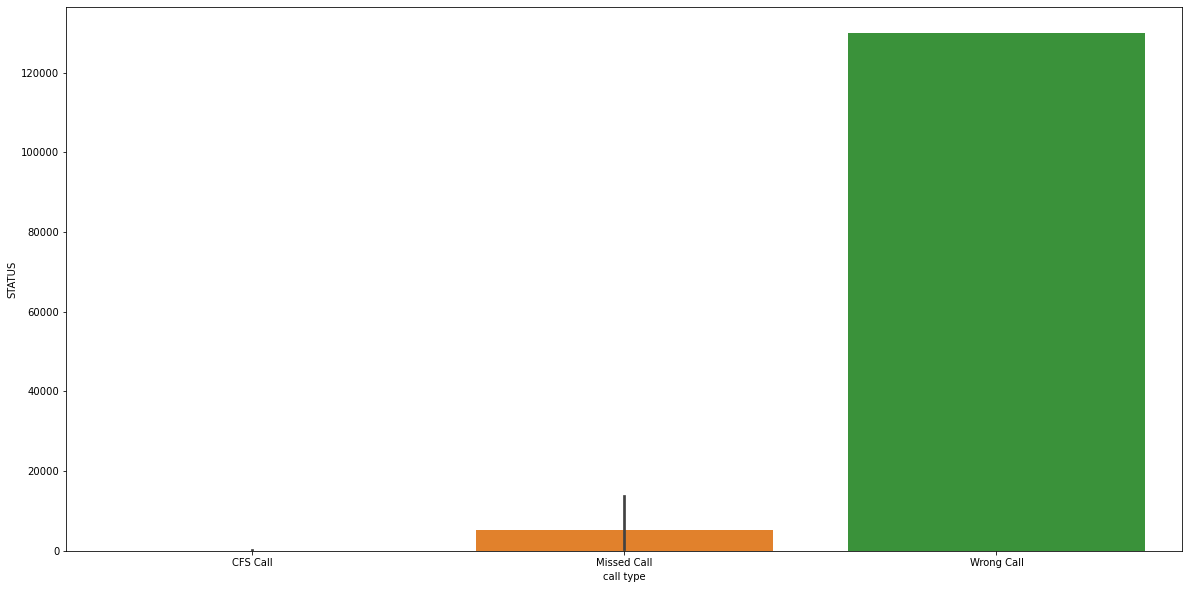

In [157]:
plt.figure(figsize = (20,10))
sns.barplot( y = eventlog['STATUS'].value_counts(), x = status['CALL_TYPE'] )
plt.xlabel('call type')
plt.ylabel('STATUS')